Index(['frequency', 'length', 'n_avg_hypernyms', 'n_avg_hyponyms',
       'n_avg_synonyms', 'n_consonantconjuncts', 'n_consonants', 'n_hypernyms',
       'n_hyponyms', 'n_syllables', 'n_synonyms', 'n_synsets', 'n_vowels',
       'label'],
      dtype='object')
       frequency    length  n_avg_hypernyms  n_avg_hyponyms  n_avg_synonyms  \
label                                                                         
0       0.114722  0.437629         0.366372        0.267354        0.537467   
1       0.081822  0.418202         0.364580        0.257636        0.565932   

       n_consonantconjuncts  n_consonants  n_hypernyms  n_hyponyms  \
label                                                                
0                  0.265681      0.439478     0.209819    0.177744   
1                  0.255917      0.415891     0.233270    0.196395   

       n_syllables  n_synonyms  n_synsets  n_vowels  
label                                                
0         0.458886    0.268864   

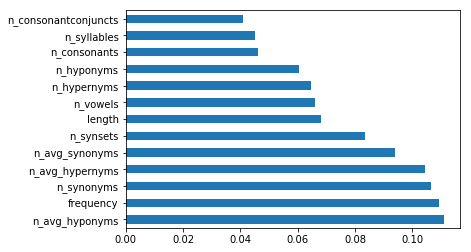

Weight,Feature
0.2860 ± 0.0058,n_avg_hyponyms
0.2176 ± 0.0105,n_synsets
0.2171 ± 0.0129,n_avg_hypernyms
0.1912 ± 0.0066,n_synonyms
0.1772 ± 0.0030,n_hyponyms
0.1732 ± 0.0114,frequency
0.1283 ± 0.0065,n_avg_synonyms
0.1232 ± 0.0076,n_vowels
0.1172 ± 0.0086,n_hypernyms
0.1091 ± 0.0087,n_consonantconjuncts


[(0, 7505), (1, 1747)]
[(0, 1747), (1, 1747)]
frequency               0.128290
length                  0.049661
n_avg_hypernyms         0.097247
n_avg_hyponyms          0.098643
n_avg_synonyms          0.073605
n_consonantconjuncts    0.045924
n_consonants            0.046754
n_hypernyms             0.111339
n_hyponyms              0.071652
n_syllables             0.054647
n_synonyms              0.106368
n_synsets               0.051427
n_vowels                0.064443
dtype: float64


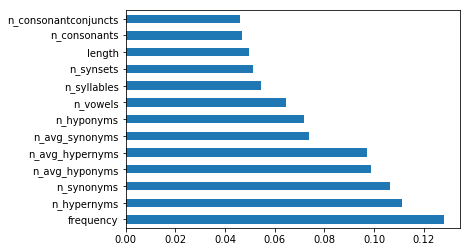

Weight,Feature
0.2842 ± 0.0122,n_hypernyms
0.2226 ± 0.0062,n_hyponyms
0.1926 ± 0.0092,n_avg_hyponyms
0.1922 ± 0.0040,frequency
0.1778 ± 0.0094,n_avg_hypernyms
0.1777 ± 0.0095,n_synonyms
0.1177 ± 0.0036,n_avg_synonyms
0.1117 ± 0.0098,n_synsets
0.1038 ± 0.0098,n_consonantconjuncts
0.0936 ± 0.0029,n_vowels


[(0, 7506), (1, 1746)]
[(0, 1746), (1, 1746)]
frequency               0.101231
length                  0.067126
n_avg_hypernyms         0.081664
n_avg_hyponyms          0.105755
n_avg_synonyms          0.104369
n_consonantconjuncts    0.049763
n_consonants            0.051865
n_hypernyms             0.102654
n_hyponyms              0.070276
n_syllables             0.054481
n_synonyms              0.104907
n_synsets               0.044376
n_vowels                0.061534
dtype: float64


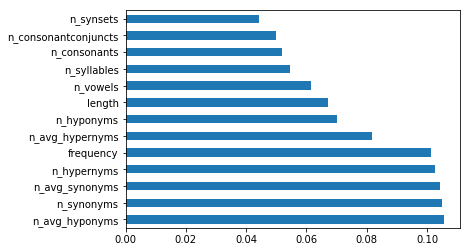

Weight,Feature
0.2780 ± 0.0135,n_avg_hyponyms
0.2437 ± 0.0056,n_hyponyms
0.2092 ± 0.0082,n_hypernyms
0.1993 ± 0.0111,n_synonyms
0.1767 ± 0.0120,frequency
0.1663 ± 0.0108,n_avg_synonyms
0.1364 ± 0.0069,n_avg_hypernyms
0.1186 ± 0.0073,length
0.1085 ± 0.0096,n_synsets
0.0990 ± 0.0045,n_vowels


[(0, 7506), (1, 1746)]
[(0, 1746), (1, 1746)]
frequency               0.107196
length                  0.065914
n_avg_hypernyms         0.092475
n_avg_hyponyms          0.092500
n_avg_synonyms          0.089250
n_consonantconjuncts    0.041050
n_consonants            0.065317
n_hypernyms             0.100019
n_hyponyms              0.067264
n_syllables             0.051853
n_synonyms              0.114647
n_synsets               0.057901
n_vowels                0.054615
dtype: float64


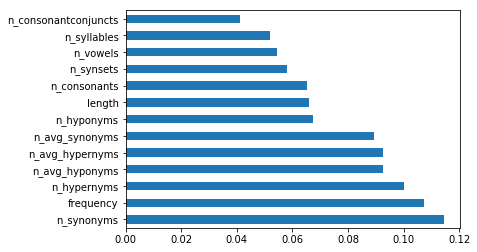

Weight,Feature
0.2765 ± 0.0185,n_hypernyms
0.2667 ± 0.0097,n_synonyms
0.2041 ± 0.0120,n_avg_hyponyms
0.1948 ± 0.0142,n_hyponyms
0.1813 ± 0.0068,n_avg_hypernyms
0.1566 ± 0.0053,frequency
0.1469 ± 0.0049,n_avg_synonyms
0.1362 ± 0.0080,n_synsets
0.0955 ± 0.0025,length
0.0885 ± 0.0037,n_consonants


[(0, 7506), (1, 1746)]
[(0, 1746), (1, 1746)]
frequency               0.127951
length                  0.056900
n_avg_hypernyms         0.106737
n_avg_hyponyms          0.115738
n_avg_synonyms          0.088499
n_consonantconjuncts    0.034962
n_consonants            0.048963
n_hypernyms             0.071030
n_hyponyms              0.076525
n_syllables             0.045520
n_synonyms              0.089816
n_synsets               0.076597
n_vowels                0.060760
dtype: float64


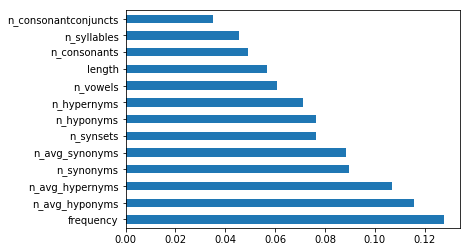

Weight,Feature
0.2828 ± 0.0126,n_avg_hyponyms
0.2662 ± 0.0132,n_avg_hypernyms
0.1899 ± 0.0046,n_hyponyms
0.1769 ± 0.0068,n_synsets
0.1655 ± 0.0047,n_hypernyms
0.1604 ± 0.0107,n_synonyms
0.1603 ± 0.0062,frequency
0.1498 ± 0.0058,n_avg_synonyms
0.0830 ± 0.0057,n_vowels
0.0738 ± 0.0052,n_consonants


In [2]:
import os
import time
import json
import pandas as pd
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
import eli5
from eli5.sklearn import PermutationImportance
from collections import Counter
import matplotlib.pyplot as plt
from IPython.display import display

from models import get_model

#from data_tests import *
from evaluation import get_accuracy

def crossvalidate(splits, X, y, baseline = -1, model_num = None, resample = 0, 
feature_set = None, n_features = 0, feature_importance = 0, average_method='macro', path= None):
    """
    Store the results calculated according to the arguments and store them in a file.
    Arguments:
    splits (int): number of folds
    X (dataframe): examples
    y (dataframe): target/label
    baseline (int): -1 for no baseline, 1 for all predictions as 1, 0 for all predictions as 0
    model_num (int): classification model
    1: 
    2:
    3:
    4:
    5:
    6:
    resample (int): -1 for undersampling, 1 for oversampling and 0 for no resampling
    feature_set (list): list of features to be considered
    n_features (int): the number of features to be considered at a time for classification/importance
    feature_importance (int): 0 for absent, 1 for present
    average_method: macro by default
    path: the path to the directory where the recordings should be stored
    """
    

    #prepare the dictionary to be written to the file
    data_dict = dict()
    dir_name = path + str(time.time())
    os.mkdir(dir_name)
    #open the config file for writing
    config_file = open(dir_name + '/config.jso n', 'w')
    data_dict =  {'model_num':model_num}
    data_dict =  {'baseline':baseline}
    data_dict.update({'resample':resample})
    data_dict.update({'feature_set':feature_set})
    data_dict.update({'n_features':n_features})
    data_dict.update({'feature_importance':feature_importance})

    model = get_model(model_num)
    
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    
    accuracy_values = list()
    
    for train_index, test_index in kfold.split(X, y):
        #create train-test splits
        X_train, y_train = X.iloc[train_index], y.iloc[train_index]
        X_test, y_test = X.iloc[test_index], y.iloc[test_index]

        #create test set labels for the baseline if applicable
        if baseline == 0:
            y_test = y_test.replace(1,0)
        elif baseline == 1:
            y_test = y_test.replace(0,1)
            
        #resample the training set (if applicable)
        if resample == -1:
            #undersample
            '''NearMiss 3 . NearMiss-3 is a 2-step algorithm: first, for each minority sample, 
            their :m nearest-neighbors will be kept; then, the majority samples selected are the 
            on for which the average distance to the k nearest neighbors is the largest.'''
            nm = NearMiss(version=3)
            print(str(sorted(Counter(y_train).items())))
            X_resampled, y_resampled = nm.fit_resample(X_train, y_train)
            X_train = X_resampled
            y_train = y_resampled
            print(sorted(Counter(y_train).items()))
        elif resample == 1:
            #oversample
            X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
            X_train = X_resampled
            y_train = y_resampled
            print(sorted(Counter(y_resampled).items()))
        #write the training dataset class distribution to the file
        file = open(dir_name + '/train_val_dist.csv', 'a')
        file.write(str(sorted(Counter(y_train).items())))
        file.write('\n')
        file.close()

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = get_accuracy(y_test, y_pred)
        accuracy_values.append(accuracy * 100)

        if feature_importance == 1:
            if model_num == 1 or model_num == 3:
                feat_importances = pd.Series(model.feature_importances_, index=X.columns)
            elif model_num == 2:
                feat_importances = pd.Series(abs(svm.coef_[0]), index=X.columns)
            print(feat_importances)
            feat_importances.nlargest(20).plot(kind='barh')
            #plot_importance(model)
            plt.show()
            
            perm = PermutationImportance(model, random_state=1).fit(X_train, y_train)
            display(eli5.show_weights(perm, feature_names = X_train.columns.tolist()))

            #write the feature importance values to the file
            file = open(dir_name + '/feature_importances.csv', 'a')
            file.write(str(model.feature_importances_))
            file.write('\n')
            file.close()

            #write the permutation importance values to the file
            file = open(dir_name + '/permutation_feature_importances.csv', 'a')
            file.write(str(perm))
            file.write('\n')
            file.close()

    data_dict['accuracy'] = sum(accuracy_values)/len(accuracy_values)
    json.dump(data_dict, config_file)
    config_file.close()

data = pd.read_csv('/opt/PhD/Work/JHWNL_1_2/Data/CleanedData/Basic Binary Classification/DataForClassification.csv')
#print(data.iloc[:, 1:-1].head())
del data['word']
print(data.columns)
print(data.groupby('label').mean()) #class means
#splits is 5 so that the test size is 1/5 = 20%
crossvalidate(5, data.iloc[:, :-1], data.label, model_num = 1, feature_importance = 1, baseline = -1, resample = -1, path = '/opt/PhD/Work/JHWNL_1_2/Data/Analysis/') 
#TODO: permutation feature importance
#TODO: evaluation and learning curve
#TODO: run this in a notebook